In [1]:
from bergen import Bergen
from bergen.query import QueryList

client = Bergen(
        host="p-tnagerl-lab1",
        port=8000,
        client_id="DSNwVKbSmvKuIUln36FmpWNVE2KrbS2oRX0ke8PJ", 
        client_secret="L2aEjVmNwnSyIGHWbQJo6bWMDoIUlBqvUyoGWUWAe6jI3KRXDOsD13gkYVCZR0po1BLFO9QT4lktKODHDs0GyyJEzmIjkpEOItfdCC4zIa3Qzu",
        name="nanana",
        jupyter=True,
        force_sync=True
)
client

Connected to,lovely-lime-oyster


In [2]:
from grunnlag.schema import Representation, Sample

prediction_set = QueryList("""
query {
  representations(variety: "VOXEL", experiment: 22) {
      id
      name
      variety
      store
  }
}
""",Representation).run()
prediction_set

,id,name,store,variety
0,323,stack,40-sample.representation.9b0decb8-7b7b-402c-9529-1a3edb7c11b0,RepresentationVariety.VOXEL


In [3]:
from stardist import random_label_cmap
from stardist.models import StarDist3D
from csbdeep.utils import Path, normalize
from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available


X_data = map(lambda rep: rep.data, prediction_set)
X = list(map(lambda x: x.sel(c=0, t=0).transpose(*"zxy").data.compute(), X_data))
axis_norm = (0,1,2) 
X = list([normalize(x,1,99.8,axis=axis_norm) for x in X])

In [4]:
model = StarDist3D.from_pretrained('3D_demo')


Found model '3D_demo' for 'StarDist3D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.707933, nms_thresh=0.3.


In [5]:
img = normalize(X[0], 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)

In [7]:
labels.shape

(40, 600, 600)

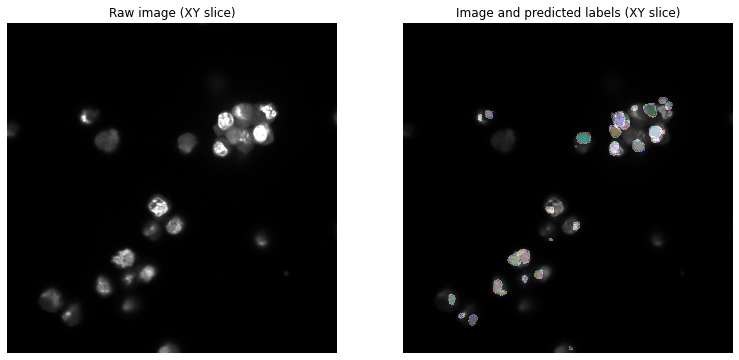

In [11]:
plt.figure(figsize=(13,10))
z = max(0, img.shape[0] // 2 - 5)
plt.subplot(121)
plt.imshow((img if img.ndim==3 else img[...,:3])[z], clim=(0,1), cmap='gray')
plt.title('Raw image (XY slice)')
plt.axis('off')
plt.subplot(122)
plt.imshow((img if img.ndim==3 else img[...,:3])[z], clim=(0,1), cmap='gray')
plt.imshow(labels[z], cmap=lbl_cmap, alpha=0.5)
plt.title('Image and predicted labels (XY slice)')
plt.axis('off');